In [2]:
import os, sys
import pickle
import pandas as pd
import numpy as np

#sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('SPI_model'))))
from pyvital2 import arr, vitaldb, pleth_spi

# creating histogram
print("created a new group histogram\n")
group_hist_ppga = pleth_spi.Histogram(0, 20, 1000)
group_hist_hbi = pleth_spi.Histogram(240, 2000, 1000)

non_list = []
vital_path = 'PACU_vital/PACU1_10-12'
vital_list = os.listdir(vital_path)

srate, cnt = 100, 0
# 추가 샘플을 group histo 에 집어넣음
for f_vital in vital_list:
    cnt += 1
    cachepath = "cache/PPG/hbi_ppga_" + f_vital
    
    #이미 저장된 pickle 파일이 있으면 loading -> group histogram을 훈련시킴
    if os.path.exists(cachepath):
        print('({}/{}) '.format(cnt, len(vital_list)), end=' ')
        print('already existing...loading sample... '+f_vital, end='')
        print('loading sample '+f_vital)
        #hbi_list, ppga_list = pickle.load(open(cachepath, 'rb'))
        
        #for hbi in hbi_list:
        #    group_hist_hbi.learn(hbi)
        #for ppga in ppga_list:
        #    group_hist_ppga.learn(ppga)
            
    #저장된 pickle 파일이 없으면 새로 계산해서 저장   
    else:
        print('({}/{}) '.format(cnt, len(vital_list)), end='')
        if not '.vital' in f_vital:
            print('not a vital file')
            non_list.append(f_vital)
            continue
        
        vals = vitaldb.vital_recs(vital_path+'/'+f_vital, ['SNUADCW/PLETH'], interval = 0.01).flatten()
        print('size of', f_vital, ':', len(vals), end='')
        
        # vals 값이 none 밖에 없는 경우
        if len(vals)==1:
            print('no data')
            non_list.append(f_vital)
            continue
            
        print('\ndetecting peak...', end='')
        vals = arr.exclude_undefined(vals)
        
        # vals 값이 일정한 경우
        if len(np.unique(vals)) == 1:
            print('no valid data')
            non_list.append(f_vital)
            continue
        
        try:
            minlist, maxlist = arr.detect_peaks(vals, 100)
            print('completed...')

            hbi_list, ppga_list = [], []
            for j in range(len(maxlist) - 1):
                hbi = (maxlist[j+1] - maxlist[j]) / srate * 1000
                if 240 < hbi < 2000:
                    #group_hist_hbi.learn(hbi)
                    hbi_list.append(hbi)
                ppga = vals[maxlist[j+1]] - vals[minlist[j]]
                if 0 < ppga < 100:
                    #group_hist_ppga.learn(ppga)
                    ppga_list.append(ppga)    

            pickle.dump((hbi_list, ppga_list), open(cachepath, 'wb'))
        except:
            print('error')
            non_list.append(f_vital)

created a new group histogram

(1/678)  already existing...loading sample... PACU1_12_200115_153355.vitalloading sample PACU1_12_200115_153355.vital
(2/678)  already existing...loading sample... PACU1_10_190827_113303.vitalloading sample PACU1_10_190827_113303.vital
(3/678)  already existing...loading sample... PACU1_10_190429_163301.vitalloading sample PACU1_10_190429_163301.vital
(4/678)  already existing...loading sample... PACU1_11_200117_155606.vitalloading sample PACU1_11_200117_155606.vital
(5/678)  already existing...loading sample... PACU1_11_200114_103104.vitalloading sample PACU1_11_200114_103104.vital
(6/678)  already existing...loading sample... PACU1_11_190708_161809.vitalloading sample PACU1_11_190708_161809.vital
(7/678)  already existing...loading sample... PACU1_11_200715_165207.vitalloading sample PACU1_11_200715_165207.vital
(8/678)  already existing...loading sample... PACU1_11_190429_120455.vitalloading sample PACU1_11_190429_120455.vital
(9/678)  already existing

detecting peak...completed...
(75/678)  already existing...loading sample... PACU1_11_200107_130040.vitalloading sample PACU1_11_200107_130040.vital
(76/678)  already existing...loading sample... PACU1_10_200508_143252.vitalloading sample PACU1_10_200508_143252.vital
(77/678)  already existing...loading sample... PACU1_10_200120_161227.vitalloading sample PACU1_10_200120_161227.vital
(78/678)  already existing...loading sample... PACU1_11_200319_164313.vitalloading sample PACU1_11_200319_164313.vital
(79/678)  already existing...loading sample... PACU1_11_190607_155343.vitalloading sample PACU1_11_190607_155343.vital
(80/678)  already existing...loading sample... PACU1_11_200527_145624.vitalloading sample PACU1_11_200527_145624.vital
(81/678)  already existing...loading sample... PACU1_10_190516_171941.vitalloading sample PACU1_10_190516_171941.vital
(82/678)  already existing...loading sample... PACU1_11_200316_155524.vitalloading sample PACU1_11_200316_155524.vital
(83/678)  already 

detecting peak...completed...
(149/678)  already existing...loading sample... PACU1_11_190726_154710.vitalloading sample PACU1_11_190726_154710.vital
(150/678)  already existing...loading sample... PACU1_10_201028_093439.vitalloading sample PACU1_10_201028_093439.vital
(151/678) size of PACU1_10_200225_140955.vital : 263035
detecting peak...completed...
(152/678) size of PACU1_10_200207_131048.vital : 249140
detecting peak...completed...
(153/678) size of PACU1_10_200214_152045.vital : 250592
detecting peak...completed...
(154/678)  already existing...loading sample... PACU1_10_200513_125434.vitalloading sample PACU1_10_200513_125434.vital
(155/678)  already existing...loading sample... PACU1_12_190905_121448.vitalloading sample PACU1_12_190905_121448.vital
(156/678) size of PACU1_10_200214_112353.vital : 233168
detecting peak...completed...
(157/678)  already existing...loading sample... PACU1_11_200303_131125.vitalloading sample PACU1_11_200303_131125.vital
(158/678)  already existin

detecting peak...completed...
(230/678)  already existing...loading sample... PACU1_12_190515_154226.vitalloading sample PACU1_12_190515_154226.vital
(231/678)  already existing...loading sample... PACU1_11_190529_132650.vitalloading sample PACU1_11_190529_132650.vital
(232/678)  already existing...loading sample... PACU1_10_200114_134033.vitalloading sample PACU1_10_200114_134033.vital
(233/678) size of PACU1_12_200221_140131.vital : 213096
detecting peak...completed...
(234/678)  already existing...loading sample... PACU1_10_190820_115608.vitalloading sample PACU1_10_190820_115608.vital
(235/678)  already existing...loading sample... PACU1_11_200706_125541.vitalloading sample PACU1_11_200706_125541.vital
(236/678)  already existing...loading sample... PACU1_10_201028_152639.vitalloading sample PACU1_10_201028_152639.vital
(237/678)  already existing...loading sample... PACU1_10_190903_153947.vitalloading sample PACU1_10_190903_153947.vital
(238/678)  already existing...loading sample

detecting peak...completed...
(305/678)  already existing...loading sample... PACU1_12_190704_164600.vitalloading sample PACU1_12_190704_164600.vital
(306/678)  already existing...loading sample... PACU1_11_190515_132816.vitalloading sample PACU1_11_190515_132816.vital
(307/678)  already existing...loading sample... PACU1_10_190829_170015.vitalloading sample PACU1_10_190829_170015.vital
(308/678)  already existing...loading sample... PACU1_10_200806_150024.vitalloading sample PACU1_10_200806_150024.vital
(309/678)  already existing...loading sample... PACU1_10_200911_172005.vitalloading sample PACU1_10_200911_172005.vital
(310/678) size of PACU1_12_200205_143346.vital : 261511
detecting peak...completed...
(311/678)  already existing...loading sample... PACU1_10_200923_104916.vitalloading sample PACU1_10_200923_104916.vital
(312/678)  already existing...loading sample... PACU1_11_201005_142838.vitalloading sample PACU1_11_201005_142838.vital
(313/678)  already existing...loading sample

detecting peak...completed...
(389/678)  already existing...loading sample... PACU1_12_201026_164359.vitalloading sample PACU1_12_201026_164359.vital
(390/678)  already existing...loading sample... PACU1_11_200911_153855.vitalloading sample PACU1_11_200911_153855.vital
(391/678)  already existing...loading sample... PACU1_12_190517_120647.vitalloading sample PACU1_12_190517_120647.vital
(392/678)  already existing...loading sample... PACU1_12_190822_163908.vitalloading sample PACU1_12_190822_163908.vital
(393/678)  already existing...loading sample... PACU1_11_190823_164251.vitalloading sample PACU1_11_190823_164251.vital
(394/678)  already existing...loading sample... PACU1_12_190530_161916.vitalloading sample PACU1_12_190530_161916.vital
(395/678)  already existing...loading sample... PACU1_10_200714_173350.vitalloading sample PACU1_10_200714_173350.vital
(396/678)  already existing...loading sample... PACU1_12_190516_145430.vitalloading sample PACU1_12_190516_145430.vital
(397/678) 

detecting peak...completed...
(465/678)  already existing...loading sample... PACU1_10_200819_111407.vitalloading sample PACU1_10_200819_111407.vital
(466/678)  already existing...loading sample... PACU1_10_190612_144246.vitalloading sample PACU1_10_190612_144246.vital
(467/678)  already existing...loading sample... PACU1_11_190514_165036.vitalloading sample PACU1_11_190514_165036.vital
(468/678)  already existing...loading sample... PACU1_11_200706_164535.vitalloading sample PACU1_11_200706_164535.vital
(469/678)  already existing...loading sample... PACU1_11_191017_140015.vitalloading sample PACU1_11_191017_140015.vital
(470/678)  already existing...loading sample... PACU1_12_200626_100506.vitalloading sample PACU1_12_200626_100506.vital
(471/678) size of PACU1_10_200122_092803.vital : 276123
detecting peak...completed...
(472/678)  already existing...loading sample... PACU1_10_200507_144108.vitalloading sample PACU1_10_200507_144108.vital
(473/678)  already existing...loading sample

detecting peak...completed...
(537/678)  already existing...loading sample... PACU1_12_200109_150545.vitalloading sample PACU1_12_200109_150545.vital
(538/678)  already existing...loading sample... PACU1_10_200115_102044.vitalloading sample PACU1_10_200115_102044.vital
(539/678)  already existing...loading sample... PACU1_11_200326_134755.vitalloading sample PACU1_11_200326_134755.vital
(540/678)  already existing...loading sample... PACU1_12_190820_153404.vitalloading sample PACU1_12_190820_153404.vital
(541/678)  already existing...loading sample... PACU1_10_190909_125533.vitalloading sample PACU1_10_190909_125533.vital
(542/678) size of PACU1_10_200224_165305.vital : 238213
detecting peak...completed...
(543/678)  already existing...loading sample... PACU1_12_190903_104022.vitalloading sample PACU1_12_190903_104022.vital
(544/678)  already existing...loading sample... PACU1_11_200729_131331.vitalloading sample PACU1_11_200729_131331.vital
(545/678) size of PACU1_10_200220_163047.vit

detecting peak...completed...
(614/678)  already existing...loading sample... PACU1_10_200603_131444.vitalloading sample PACU1_10_200603_131444.vital
(615/678)  already existing...loading sample... PACU1_10_200512_174020.vitalloading sample PACU1_10_200512_174020.vital
(616/678)  already existing...loading sample... PACU1_12_190819_175604.vitalloading sample PACU1_12_190819_175604.vital
(617/678)  already existing...loading sample... PACU1_10_200612_133526.vitalloading sample PACU1_10_200612_133526.vital
(618/678)  already existing...loading sample... PACU1_11_200702_145157.vitalloading sample PACU1_11_200702_145157.vital
(619/678)  already existing...loading sample... PACU1_12_191022_145850.vitalloading sample PACU1_12_191022_145850.vital
(620/678)  already existing...loading sample... PACU1_11_191017_151943.vitalloading sample PACU1_11_191017_151943.vital
(621/678)  already existing...loading sample... PACU1_11_200605_161620.vitalloading sample PACU1_11_200605_161620.vital
(622/678) 

In [9]:
np.unique(vals)

array([-197.265625, -196.875   , -196.484375, -167.96875 ,  199.609375])

In [8]:
len(np.unique(vals))==1

True

In [4]:
vital_list[496]

'PACU1_8_200714_170315.vital'

(array([     0.,      0.,      0.,      0.,      0., 352110.,      0.,
             0.,      0.,      0.]),
 array([199.109375, 199.209375, 199.309375, 199.409375, 199.509375,
        199.609375, 199.709375, 199.809375, 199.909375, 200.009375,
        200.109375]),
 <BarContainer object of 10 artists>)

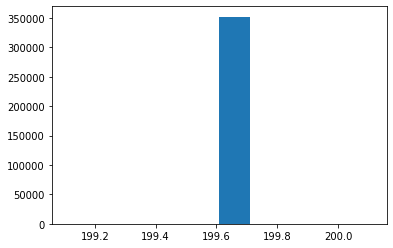

In [3]:
import matplotlib.pyplot as plt
plt.hist(vals)